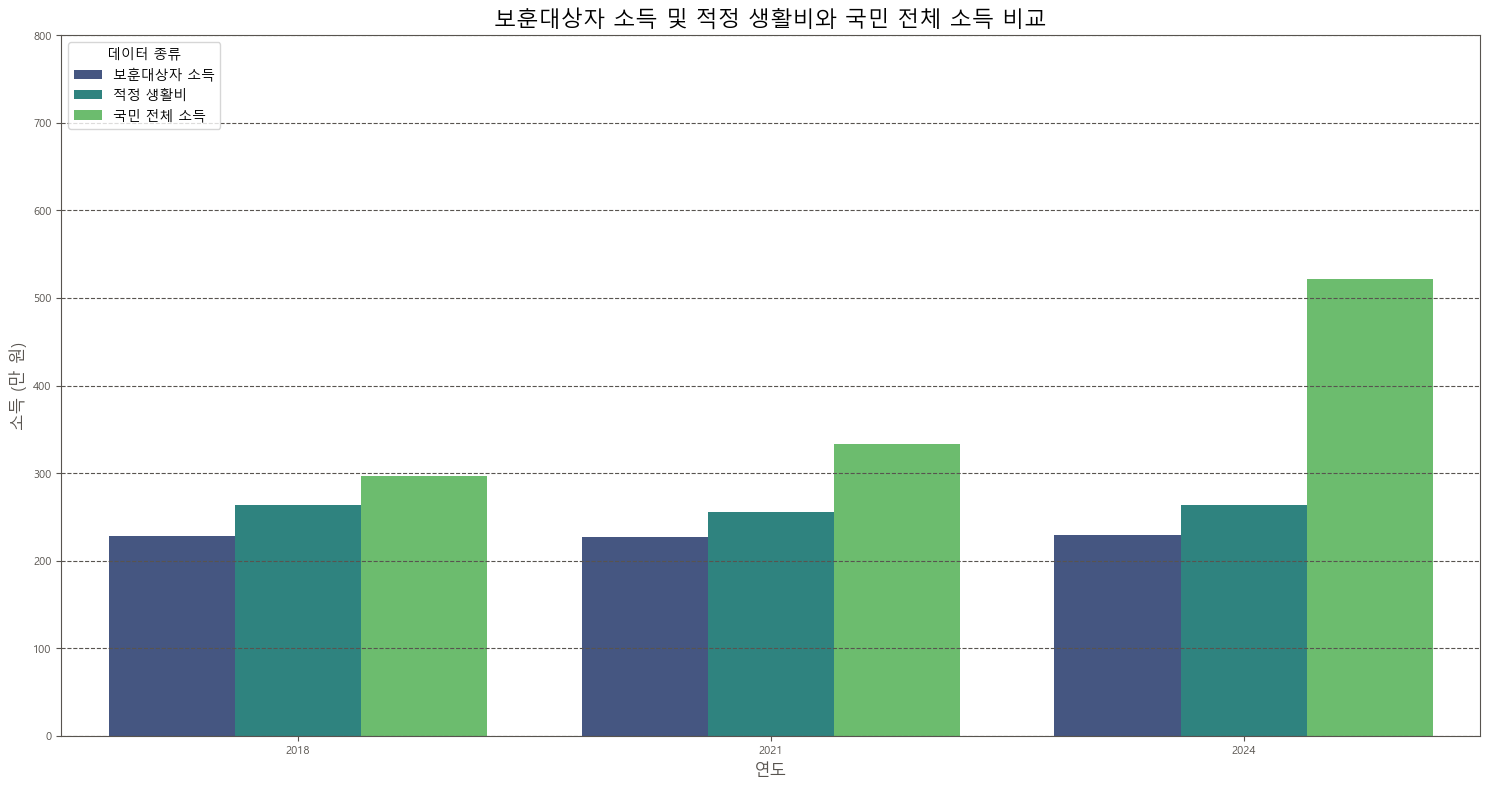

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터 불러오기
df_income = pd.read_csv('보훈대상자 평균 개인소득 총집합(빨간글씨반영).csv')
df_living = pd.read_csv('노후생활 월평균 생활비 총집합.csv')

# 1. 국민 전체 월평균 소득 데이터 생성 (검색 기반)
# 2018년: 297만원, 2021년: 333만원, 2024년: 521.5만원 (출처: 정책브리핑 등)
# 각 유공자 분류에 동일한 국민 소득 데이터 추가
national_income_data = []
for year in [2018, 2021, 2024]:
    if year == 2018:
        income = 297
    elif year == 2021:
        income = 333
    else:
        income = 521.5
    
    # 모든 '구분'에 동일한 국민 소득 데이터 추가
    for group in df_income['구분'].unique():
        national_income_data.append({
            '구분': group,
            '소득 (만 원)': income,
            '연도': year,
            '데이터 종류': '국민 전체 소득'
        })

df_korean = pd.DataFrame(national_income_data)


df_income_filtered = df_income[['구분', '월간 소득', '연도']].rename(columns={'월간 소득': '소득 (만 원)'})
df_income_filtered['데이터 종류'] = '보훈대상자 소득'

df_living_filtered = df_living[df_living['생활비'] == '적정 생활비'].copy()
df_living_filtered = df_living_filtered.rename(columns={'비용': '소득 (만 원)'})
df_living_filtered['데이터 종류'] = '적정 생활비'
df_living_filtered = df_living_filtered[['구분', '소득 (만 원)', '연도', '데이터 종류']]


combined_df = pd.concat([df_income_filtered, df_living_filtered, df_korean])
combined_df['소득 (만 원)'] = combined_df['소득 (만 원)'].astype(float)


plt.figure(figsize=(15, 8))
sns.barplot(
    data=combined_df,
    x='연도',
    y='소득 (만 원)',
    hue='데이터 종류',
    palette='viridis',
    errorbar=None
)

plt.title('보훈대상자 소득 및 적정 생활비와 국민 전체 소득 비교', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('소득 (만 원)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend(title='데이터 종류', loc='upper left')
plt.ylim(0, 800)

plt.tight_layout()
plt.show()

In [17]:
df_income_filtered.head()

,구분,소득 (만 원),연도,데이터 종류
0,국가유공자(본인),354.4,2018,보훈대상자 소득
1,국가유공자(유족),168.8,2018,보훈대상자 소득
2,참전유공자,153.2,2018,보훈대상자 소득
3,고엽제,191.8,2018,보훈대상자 소득
4,특수임무유공자,272.8,2018,보훈대상자 소득


In [18]:
df_korean

,구분,소득 (만 원),연도,데이터 종류
0,국가유공자(본인),297.0,2018,국민 전체 소득
1,국가유공자(유족),297.0,2018,국민 전체 소득
2,참전유공자,297.0,2018,국민 전체 소득
3,고엽제,297.0,2018,국민 전체 소득
4,특수임무유공자,297.0,2018,국민 전체 소득
5,국가유공자(본인),333.0,2021,국민 전체 소득
6,국가유공자(유족),333.0,2021,국민 전체 소득
7,참전유공자,333.0,2021,국민 전체 소득
8,고엽제,333.0,2021,국민 전체 소득
9,특수임무유공자,333.0,2021,국민 전체 소득


In [16]:
combined_df.head()

,구분,소득 (만 원),연도,데이터 종류
0,국가유공자(본인),354.4,2018,보훈대상자 소득
1,국가유공자(유족),168.8,2018,보훈대상자 소득
2,참전유공자,153.2,2018,보훈대상자 소득
3,고엽제,191.8,2018,보훈대상자 소득
4,특수임무유공자,272.8,2018,보훈대상자 소득


In [7]:
pip install sweetviz


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
    --------------------------------------- 0.3/15.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.1 MB 837.5 kB/s eta 0:00:18
   - -------------------------------------- 0.5/15.1 MB 837.5 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/15.1 MB 762.0 kB/s eta 0:00:19
   -- ------------------------------------- 1.0/15.1 MB 774.0 kB/s eta 0:00:19
   -- ------------------------------------- 1.0/15.1 MB 774.0 kB/s eta 0:00:19
   --- ------------------------------------ 1.3/15.1 MB 762.6 kB/s eta 0:00:19
   --- ------------------------------------ 1.3/15.1 MB 762.6 kB/s eta 0:00:19
   ---- ----------------------------------- 1.6/15.1 MB 742.2 kB/s eta 0:00:19
   ---- ------------


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import sweetviz as sv

report = sv.analyze(combined_df)

report.show_html('소득_분석_리포트.html')


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) Roboto.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\USER

Report 소득_분석_리포트.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
